## KNN (K-Nearest Neighbors)

- Klasifikasi suatu data, berdasar bagaimana titik-titik data di sekitarnya diklasifikasikan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
df = pd.DataFrame(iris["data"],
                 columns= ["SL", "SW", "PL", "PW"])
df["target"] = iris["target"]
df

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


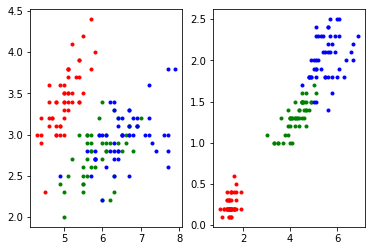

In [6]:
plt.subplot(121)
plt.plot(df["SL"][df["target"]==0], df["SW"][df["target"]==0], "r.")
plt.plot(df["SL"][df["target"]==1], df["SW"][df["target"]==1], "g.")
plt.plot(df["SL"][df["target"]==2], df["SW"][df["target"]==2], "b.")
plt.subplot(122)
plt.plot(df["PL"][df["target"]==0], df["PW"][df["target"]==0], "r.")
plt.plot(df["PL"][df["target"]==1], df["PW"][df["target"]==1], "g.")
plt.plot(df["PL"][df["target"]==2], df["PW"][df["target"]==2], "b.")

<hr>

### Neighbor Classification

In [7]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(df[["SL", "SW", "PL", "PW"]], df["target"], test_size= .2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr, ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

default neighborsnya adalah 5, yang berarti data akan diklasifikasikan berdasar 5 titik terdekat.

In [9]:
model.predict(xts)

array([2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 0, 2, 2, 1])

In [10]:
np.array(yts.tolist())

array([2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 0, 2, 2, 1])

### Looking for Nearest Neighbor

In [11]:
from sklearn.neighbors import NearestNeighbors
x = NearestNeighbors(n_neighbors= 1)
x.fit(xtr)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                 radius=1.0)

In [14]:
xts.iloc[0]

SL    7.7
SW    3.0
PL    6.1
PW    2.3
Name: 135, dtype: float64

In [13]:
x.kneighbors([xts.iloc[0]])

(array([[0.53851648]]), array([[62]]))

(array([[x]]), array ([[y]])) <br>
Artinya adalah data neighbour berjarak x dari data urutan ke y >> iloc

In [24]:
a = xts.iloc[0]
b = xtr.iloc[x.kneighbors([xts.iloc[0]])[1][0][0]]
a, b

(SL    7.7
 SW    3.0
 PL    6.1
 PW    2.3
 Name: 135, dtype: float64, SL    7.4
 SW    2.8
 PL    6.1
 PW    1.9
 Name: 130, dtype: float64)

### K-Value

- $ \sqrt{n} $ = akar pangkat 2 dari total data point yang ditraining
- Pilih nilai yang ganjil

In [25]:
len(xtr)

120

In [26]:
k = round(len(xtr) ** .5)
k

11

<hr>

In [27]:
model2 = KNeighborsClassifier(n_neighbors=k)
model2.fit(xtr, ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [28]:
print(model.score(xts, yts))
print(model2.score(xts, yts))

1.0
1.0


In [29]:
from sklearn.metrics import classification_report
print(classification_report(yts, model.predict(xts)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Model diterapkan ke seluruh data

In [30]:
from sklearn.metrics import classification_report
print(classification_report(df["target"], model.predict(df[["SL", "SW", "PL", "PW"]])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.92      0.94        50
           2       0.92      0.96      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

